In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

data = np.random.normal(170, 10, 1000)

beer2 = pd.DataFrame(data, columns=['Consumo de cerveja (litros)'])

In [4]:
random_sample =  beer2.sample(n=100)

In [5]:
k = len(beer2) // 100

systematic_sample = beer2.iloc[::k]

In [6]:
beer2['Temperatura Media (C)'] = pd.cut(beer2['Consumo de cerveja (litros)'], bins=3, labels=["Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)"])

stratified_sample = beer2.groupby('Temperatura Media (C)', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [7]:
beer2['Cluster'] = np.random.randint(0, 10, size=len(beer2))

selected_clusters = np.random.choice(10, 2, replace=False)

cluster_sample = beer2[beer2['Cluster'].isin(selected_clusters)].sample(n=100)

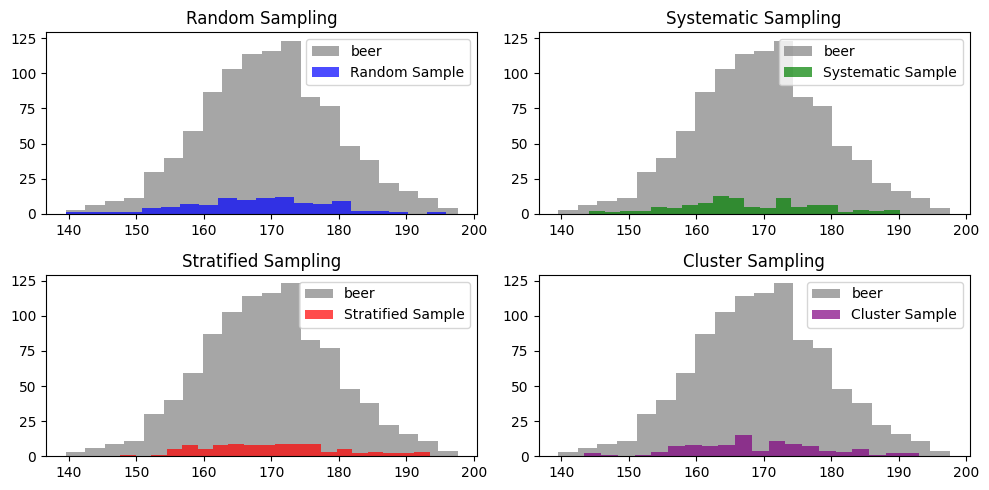

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs = axs.flatten()

axs[0].hist(beer2['Consumo de cerveja (litros)'], bins=20, color='grey', alpha=0.7, label='beer')
axs[0].hist(random_sample['Consumo de cerveja (litros)'], bins=20, color='blue', alpha=0.7, label='Random Sample')
axs[0].set_title('Random Sampling')
axs[0].legend()


axs[1].hist(beer2['Consumo de cerveja (litros)'], bins=20, color='grey', alpha=0.7, label='beer')
axs[1].hist(systematic_sample['Consumo de cerveja (litros)'], bins=20, color='green', alpha=0.7, label='Systematic Sample')
axs[1].set_title('Systematic Sampling')
axs[1].legend()


axs[2].hist(beer2['Consumo de cerveja (litros)'], bins=20, color='grey', alpha=0.7, label='beer')
axs[2].hist(stratified_sample['Consumo de cerveja (litros)'], bins=20, color='red', alpha=0.7, label='Stratified Sample')
axs[2].set_title('Stratified Sampling')
axs[2].legend()


axs[3].hist(beer2['Consumo de cerveja (litros)'], bins=20, color='grey', alpha=0.7, label='beer')
axs[3].hist(cluster_sample['Consumo de cerveja (litros)'], bins=20, color='purple', alpha=0.7, label='Cluster Sample')
axs[3].set_title('Cluster Sampling')
axs[3].legend()


plt.tight_layout()
plt.show()